In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.isnull().sum()[train.isnull().sum() > 1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
LotFrontageMean = train['LotFrontage'].mean()
train['LotFrontage'].fillna(LotFrontageMean, inplace=True)

In [6]:
train['Alley'][train['Alley'].notnull()].head()

21    Grvl
30    Pave
56    Pave
79    Grvl
87    Pave
Name: Alley, dtype: object

In [7]:
train[train['Alley'] == 'Grvl'].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
92,93,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,163500
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
204,205,50,RM,50.0,3500,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,4,2009,WD,Normal,110000


### Correlation Matrix 

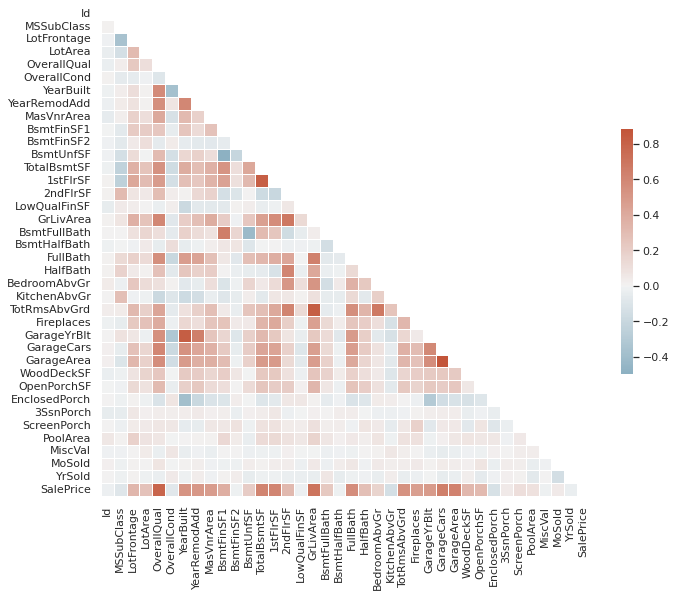

In [8]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### So, 1stFlrSF has a good positive correlation with TotalBsmtSF 

In [9]:
train.corr()['1stFlrSF'][(train.corr()['1stFlrSF'] > 0.6) | (train.corr()['1stFlrSF'] < -0.6)]\
    .sort_values(ascending=False)

1stFlrSF       1.000000
TotalBsmtSF    0.819530
SalePrice      0.605852
Name: 1stFlrSF, dtype: float64

In [10]:
best_features_correlations = train.corr()['SalePrice'][(train.corr()['SalePrice'] > 0.6)\
                                                       | (train.corr()['SalePrice'] < -0.6)]\
                                                        .sort_values().index

In [11]:
train[best_features_correlations].head()

,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,856,856,548,2,1710,7,208500
1,1262,1262,460,2,1262,6,181500
2,920,920,608,2,1786,7,223500
3,961,756,642,3,1717,7,140000
4,1145,1145,836,3,2198,8,250000


### Training model 

In [44]:
X = train[best_features_correlations[:-1]]
y = train[best_features_correlations[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_predictors = model.predict(X_test)
mean_absolute_error(y_test, y_predictors)

23285.751520666185